In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df[~df.applymap(np.isreal).all(1)])
null_columns= df.columns[df.isnull().any()]

print(df[df.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: []
Index: []


C:\Users\mayur\AppData\Local\Temp\ipykernel_28140\1869430820.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df[~df.applymap(np.isreal).all(1)])


In [4]:
import seaborn as sns
#Descriptive Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


C:\Users\mayur\AppData\Local\Temp\ipykernel_12188\2741712573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Insulin'])


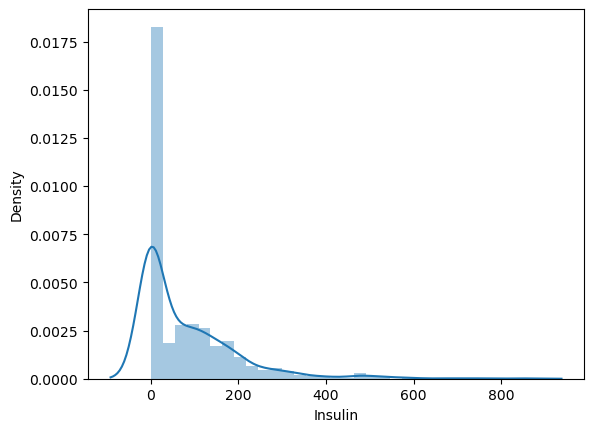

In [5]:
ax = sns.distplot(df['Insulin'])

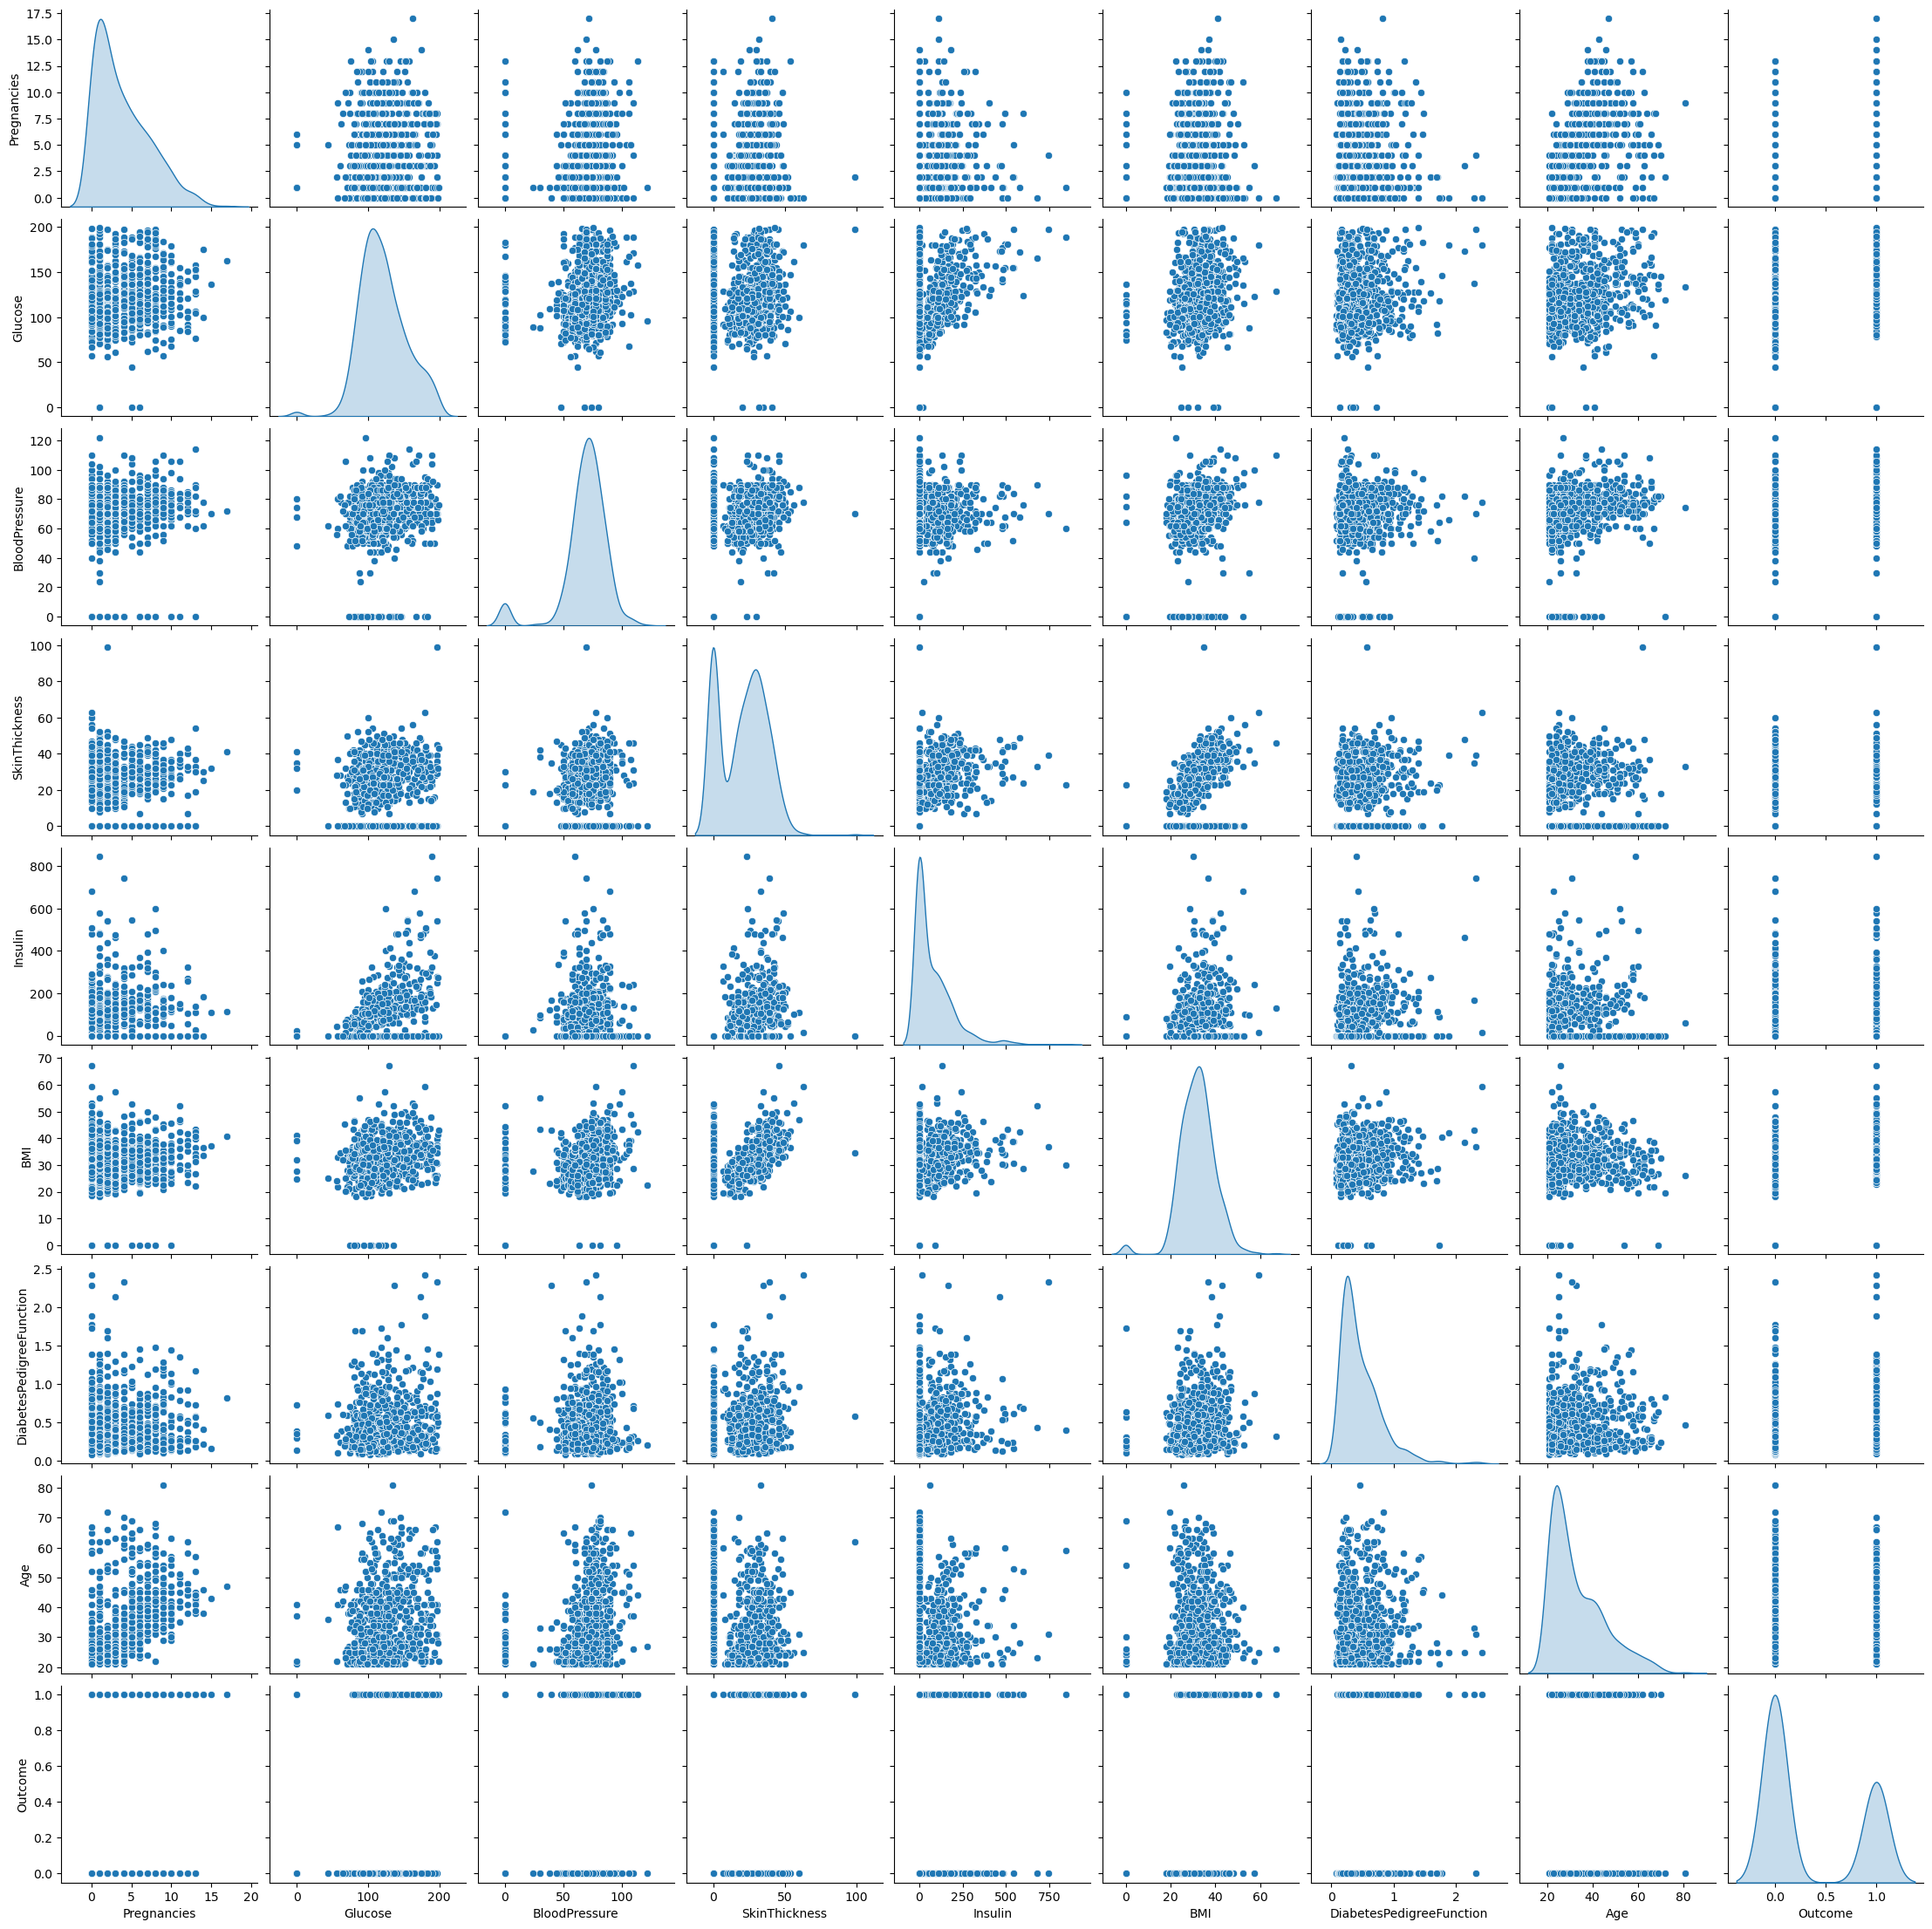

In [6]:
sns.pairplot(df, diag_kind ='kde')

In [7]:
print("pima test:",df.groupby(['Outcome']).count())

pima test:          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                500      500            500            500      500  500   
1                268      268            268            268      268  268   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             500  500  
1                             268  268  


In [8]:
data=df.copy()
df=df[df.loc[:'BMI']>0]
df.fillna(0, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [7]:
df.duplicated().sum()

0

In [9]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
#To Split our Data set into training and test data
from sklearn.model_selection import train_test_split
# To calculate accuracy measures and confusion matrix
from sklearn import metrics

In [10]:
# X = df.iloc[:,0:8]

In [11]:
# Y = df.iloc[:,8]
# seed =1 


X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df[df.columns[-1]], test_size=0.2, random_state=42)

In [12]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2.0,84.0,0.0,0.0,0.0,0.0,0.304,21
618,9.0,112.0,82.0,24.0,0.0,28.2,1.282,50
346,1.0,139.0,46.0,19.0,83.0,28.7,0.654,22
294,0.0,161.0,50.0,0.0,0.0,21.9,0.254,65
231,6.0,134.0,80.0,37.0,370.0,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5.0,139.0,64.0,35.0,140.0,28.6,0.411,26
106,1.0,96.0,122.0,0.0,0.0,22.4,0.207,27
270,10.0,101.0,86.0,37.0,0.0,45.6,1.136,38
435,0.0,141.0,0.0,0.0,0.0,42.4,0.205,29


In [13]:
y_train

60     0.0
618    1.0
346    0.0
294    0.0
231    1.0
      ... 
71     0.0
106    0.0
270    1.0
435    1.0
102    0.0
Name: Outcome, Length: 614, dtype: float64

## Logistic Regression


In [14]:
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train, y_train)

C:\Users\mayur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_predict = Logistic_model.predict(X_test)
print("Y predict/hat ", y_predict)

Y predict/hat  [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
column_label = list(X_train.columns) # To label all the coefficient
model_Coeff = pd.DataFrame(Logistic_model.coef_, columns = column_label)
model_Coeff['intercept'] = Logistic_model.intercept_
print("Coefficient Values Of The Surface Are: ", model_Coeff)

Coefficient Values Of The Surface Are:     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.068757  0.034241      -0.013654       0.004002 -0.001889  0.099882   

   DiabetesPedigreeFunction       Age  intercept  
0                  0.621477  0.033865  -8.859191  


In [17]:
logmodel_score = Logistic_model.score(X_test, y_test)
print("This is how our Model Scored:\n\n", logmodel_score)

This is how our Model Scored:

 0.7532467532467533


In [18]:
accuracy={}
accuracy['LogisticRegression']=logmodel_score
accuracy

{'LogisticRegression': 0.7532467532467533}

In [19]:
print(metrics.confusion_matrix(y_test, y_predict))

[[79 20]
 [18 37]]


## Knn

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df[df.columns[-1]], test_size=0.2, random_state=42)

In [21]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2.0,84.0,0.0,0.0,0.0,0.0,0.304,21
618,9.0,112.0,82.0,24.0,0.0,28.2,1.282,50
346,1.0,139.0,46.0,19.0,83.0,28.7,0.654,22
294,0.0,161.0,50.0,0.0,0.0,21.9,0.254,65
231,6.0,134.0,80.0,37.0,370.0,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5.0,139.0,64.0,35.0,140.0,28.6,0.411,26
106,1.0,96.0,122.0,0.0,0.0,22.4,0.207,27
270,10.0,101.0,86.0,37.0,0.0,45.6,1.136,38
435,0.0,141.0,0.0,0.0,0.0,42.4,0.205,29


In [22]:
y_train

60     0.0
618    1.0
346    0.0
294    0.0
231    1.0
      ... 
71     0.0
106    0.0
270    1.0
435    1.0
102    0.0
Name: Outcome, Length: 614, dtype: float64

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X=X_train)
X_test_scaled=scaler.transform(X=X_test)

In [24]:
X_train_scaled.dtype

dtype('float64')

In [25]:
X_train_scaled

array([[0.11764706, 0.42211055, 0.        , ..., 0.        , 0.09649872,
        0.        ],
       [0.52941176, 0.56281407, 0.67213115, ..., 0.42026826, 0.51409052,
        0.48333333],
       [0.05882353, 0.69849246, 0.37704918, ..., 0.42771982, 0.24594364,
        0.01666667],
       ...,
       [0.58823529, 0.50753769, 0.70491803, ..., 0.67958271, 0.45175064,
        0.28333333],
       [0.        , 0.70854271, 0.        , ..., 0.6318927 , 0.05422716,
        0.13333333],
       [0.        , 0.6281407 , 0.78688525, ..., 0.33532042, 0.07856533,
        0.        ]])

In [26]:
X_train_scaled1=pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

In [27]:
X_train_scaled1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000
1,0.529412,0.562814,0.672131,0.380952,0.000000,0.420268,0.514091,0.483333
2,0.058824,0.698492,0.377049,0.301587,0.098109,0.427720,0.245944,0.016667
3,0.000000,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333
4,0.352941,0.673367,0.655738,0.587302,0.437352,0.688525,0.068318,0.416667


In [28]:
X_train_scaled1.shape

(614, 8)

In [29]:
y_train.shape

(614,)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_scaled1, y_train)

KNeighborsClassifier(n_neighbors=10)

In [31]:
predictions=knn_model.predict(X_train_scaled1)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true=y_train,y_pred=predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       401
         1.0       0.77      0.54      0.63       213

    accuracy                           0.78       614
   macro avg       0.78      0.73      0.74       614
weighted avg       0.78      0.78      0.77       614



In [33]:
print(confusion_matrix(y_true=y_train, y_pred=predictions))

[[367  34]
 [ 99 114]]


In [34]:
 from sklearn.metrics import f1_score
# f1_score(y_true=y_test,y_pred=predictions)

In [35]:
test_prediction=knn_model.predict(X_test_scaled)
print(classification_report(y_true=y_test, y_pred=test_prediction))

              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80        99
         1.0       0.66      0.45      0.54        55

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.67       154
weighted avg       0.71      0.72      0.71       154



C:\Users\mayur\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [36]:
print(confusion_matrix(y_true=y_test, y_pred=test_prediction))

[[86 13]
 [30 25]]


In [37]:
f1_score(y_true=y_test, y_pred=test_prediction)

0.5376344086021505

In [38]:
f1_score(y_true=y_train, y_pred=predictions)

0.631578947368421

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_model=DecisionTreeClassifier()

In [41]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
dt_pred=dt_model.predict(X_test)

In [43]:
from sklearn import metrics

In [44]:
dt_acu=metrics.accuracy_score(y_test,dt_pred)
dt_acu

0.7402597402597403

In [45]:
accuracy['DecisionTree']=dt_acu
accuracy

{'LogisticRegression': 0.7532467532467533, 'DecisionTree': 0.7402597402597403}

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=30)

In [47]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [48]:
rf_pred=rf_model.predict(X_test)

In [49]:
rf_acu=metrics.accuracy_score(y_test,rf_pred)
rf_acu

0.7532467532467533

In [50]:
accuracy['RandomForest']=rf_acu
accuracy

{'LogisticRegression': 0.7532467532467533,
 'DecisionTree': 0.7402597402597403,
 'RandomForest': 0.7532467532467533}

# Fine tuning

In [51]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [52]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [53]:
df=df[['Pregnancies', 'Glucose', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']] # removed columns skinthickness and bloodpresserue as it has less than 10% of correlation with the outcome.

In [54]:
# recreating testing and training stes
X_train,X_test,y_train,y_test=train_test_split(df[df.columns[:-1]],df[df.columns[-1]],test_size=0.2) # this time i take .25 as testsize

In [55]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X=X_train)
X_test_scaled=scaler.transform(X=X_test)

In [56]:
X_train_scaled1=pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

In [57]:
X_train_scaled1.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.058824,0.613065,0.260047,0.740686,0.105465,0.166667
1,0.235294,0.859296,0.000000,0.649776,0.171221,0.083333
2,0.176471,0.849246,0.147754,0.445604,0.081127,0.166667
3,0.000000,0.758794,0.000000,0.627422,0.125107,0.000000
4,0.705882,0.462312,0.304965,0.411326,0.362084,0.383333


### Knn

In [58]:
knn_model=KNeighborsClassifier(n_neighbors=20) #using knn again on the updated dataset
knn_model.fit(X_train_scaled1, y_train)

KNeighborsClassifier(n_neighbors=20)

In [59]:
predictions=knn_model.predict(X_train_scaled1)

In [60]:
print(classification_report(y_true=y_train,y_pred=predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84       390
         1.0       0.78      0.55      0.64       224

    accuracy                           0.78       614
   macro avg       0.78      0.73      0.74       614
weighted avg       0.78      0.78      0.77       614



In [61]:
print(confusion_matrix(y_true=y_train, y_pred=predictions))

[[355  35]
 [101 123]]


In [62]:
f1_score(y_true=y_test, y_pred=test_prediction)

0.2682926829268293

In [63]:
f1_score(y_true=y_train, y_pred=predictions)

0.643979057591623

### logistic regression

In [64]:
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_predict = Logistic_model.predict(X_test)
print("Y predict/hat ", y_predict)

Y predict/hat  [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]


In [66]:
column_label = list(X_train.columns) # To label all the coefficient
model_Coeff = pd.DataFrame(Logistic_model.coef_, columns = column_label)
model_Coeff['intercept'] = Logistic_model.intercept_
print("Coefficient Values Of The Surface Are: ", model_Coeff)

Coefficient Values Of The Surface Are:     Pregnancies   Glucose   Insulin       BMI  DiabetesPedigreeFunction  \
0      0.08719  0.032905 -0.000828  0.087865                  0.884126   

        Age  intercept  
0  0.014999  -8.768645  


In [67]:
logmodel_score = Logistic_model.score(X_test, y_test)
print("This is how our Model Scored:\n\n", logmodel_score)

This is how our Model Scored:

 0.8246753246753247


In [68]:
new_accuracy={}
new_accuracy['LogisticRegression']=logmodel_score
new_accuracy

{'LogisticRegression': 0.8246753246753247}

### decision tree

In [69]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
dt_pred=dt_model.predict(X_test)

In [71]:
dt_acu=metrics.accuracy_score(y_test,dt_pred)
dt_acu

0.7142857142857143

In [72]:
new_accuracy['DecisionTree']=dt_acu
new_accuracy

{'LogisticRegression': 0.8246753246753247, 'DecisionTree': 0.7142857142857143}

### Random Forest

In [73]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [74]:
rf_pred=rf_model.predict(X_test)

In [75]:
rf_acu=metrics.accuracy_score(y_test,rf_pred)
rf_acu

0.7922077922077922

In [76]:
new_accuracy['RandomForest']=rf_acu
new_accuracy

{'LogisticRegression': 0.8246753246753247,
 'DecisionTree': 0.7142857142857143,
 'RandomForest': 0.7922077922077922}

# Result

In [77]:
accuracy

{'LogisticRegression': 0.7532467532467533,
 'DecisionTree': 0.7402597402597403,
 'RandomForest': 0.7532467532467533}

In [78]:
new_accuracy

{'LogisticRegression': 0.8246753246753247,
 'DecisionTree': 0.7142857142857143,
 'RandomForest': 0.7922077922077922}

## By comparing the models we find that LogisticRegression has a better accuracy than any other model